In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
df1 = pd.read_csv('day1_data_WITHOUT_ARRHYTHMIAS.csv', 
                  names = ["Time","Power","VO2","Cadence","La","RF","HR","Sat"])
df2 = pd.read_csv('day2_data_WITHOUT_ARRHYTHMIAS.csv', 
                  names = ["Time","Power","VO2","Cadence","La","RF","HR","Sat"],sep = ";")
df3 = pd.read_csv('day3_data_WITHOUT_ARRHYTHMIAS.csv', 
                  names = ["Time","Power","VO2","Cadence","La","RF","HR","Sat"], sep = ";")

In [38]:
frames = [df1,df2,df3]

df = pd.concat(frames)


In [39]:
df.shape

(8818, 8)

In [42]:
x = df.drop(['VO2',"La","Sat"], axis = 1)
y = df['VO2']

trainX, testX, trainY, testY = train_test_split(x,y, test_size = 0.2)

In [43]:
df.corr()

,Time,Power,VO2,Cadence,La,RF,HR,Sat
Time,1.000000,-0.046681,0.049032,-0.110181,0.580773,0.297472,0.171947,-0.617371
Power,-0.046681,1.000000,0.602739,0.671932,-0.016983,0.379241,0.593718,0.078258
VO2,0.049032,0.602739,1.000000,0.693714,0.209067,0.778697,0.938484,0.020588
Cadence,-0.110181,0.671932,0.693714,1.000000,-0.031408,0.462451,0.663975,0.138539
La,0.580773,-0.016983,0.209067,-0.031408,1.000000,0.491533,0.252437,-0.405162
RF,0.297472,0.379241,0.778697,0.462451,0.491533,1.000000,0.745110,-0.165612
HR,0.171947,0.593718,0.938484,0.663975,0.252437,0.745110,1.000000,0.005782
Sat,-0.617371,0.078258,0.020588,0.138539,-0.405162,-0.165612,0.005782,1.000000


In [44]:
sc = StandardScaler()

scaler = sc.fit(trainX)
trainX_scaled = scaler.transform(trainX)
testX_scaled = scaler.transform(testX)

In [55]:
mlp_reg = MLPRegressor(alpha = 0.0001,hidden_layer_sizes=(150,100,50), 
                       learning_rate= 'adaptive', max_iter= 300, solver='adam', activation = 'relu')
mlp_reg.fit(trainX_scaled, trainY)

D:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(hidden_layer_sizes=(150, 100, 50), learning_rate='adaptive',
             max_iter=300)

In [135]:
y_pred = mlp_reg.predict(testX_scaled)

In [127]:
df_temp = pd.DataFrame({"Actual":testY, 'Predicted': y_pred})
df_temp.head()

,Actual,Predicted
2138,901.71,955.162828
1849,3593.90,3351.185689
1232,3480.80,3109.700727
1428,3371.60,3575.813223
1236,3083.20,3113.152082


In [128]:
print("Mean Absolute Error:", metrics.mean_absolute_error(testY, y_pred))
print("Mean Squared Error:", metrics.mean_squared_error(testY, y_pred))
print("Root Mean SquaredError:", np.sqrt(metrics.mean_squared_error(testY, y_pred)))

Mean Absolute Error: 183.82685810987797
Mean Squared Error: 58932.116502475146
Root Mean SquaredError: 242.75937984447717


As we can see, the RMSE of 242.76 with a greater set of real data to train/test on has increased the error. The previous model with these hyperparamters concluded a RMSE of 184.20.

In [58]:
param_grid = {
    'hidden_layer_sizes': [(150,100,50),(120,80,40),(100,50,30)],
    'max_iter': [50,100,300],
    'activation': ['tanh','relu'],
    'solver':['sgd','adam'],
    'alpha': [0.0001,0.5],
    'learning_rate':['constant','adaptive']
}

In [59]:
grid = GridSearchCV(mlp_reg, param_grid, n_jobs=-1, cv = 5)
grid.fit(trainX_scaled,trainY)
print(grid.best_params_)

D:\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [ 0.44692453 -4.78984903  0.62642129 -4.47921121  0.7364747  -3.35503202
  0.83635881 -4.78686183  0.66739786 -4.4802301   0.82421279 -3.3534005
  0.76790417 -4.85438084  0.5954797  -4.60056184  0.5698914  -3.6674487
  0.30570435 -4.8552032   0.78607343 -4.60399656  0.80131545 -3.66863304
  0.75484757 -4.92247064  0.79227093 -4.72858915  0.64915897 -3.99718874
  0.57563842 -4.92198329  0.74207107 -4.72850401  0.60091774 -3.99805521
  0.60110155 -4.78639953  0.57303347 -4.47837734  0.60437941 -3.35538608
  0.62430435 -4.78887134  0.65846434 -4.47765255  0.7904751  -3.35221319
  0.73031517 -4.85545739  0.5873511  -4.60305899  0.46735961 -3.66842782
  0.80315096 -4.85788858  0.81508486 -4.60355541  0.76755752 -3.66636253
  0.67657069 -4.92475553  0.55073385 -4.72845573  0.61916884 -3.99731342
  0.73369721 -4.92319848  0.76289336 -4.72850302  0.79787931 -3.99873

{'activation': 'relu', 'alpha': 0.5, 'hidden_layer_sizes': (150, 100, 50), 'learning_rate': 'constant', 'max_iter': 300, 'solver': 'adam'}


In [102]:
grid_predictions = grid.predict(testX_scaled)
print("Mean Absolute Error:", metrics.mean_absolute_error(testY, grid_predictions))
print("Mean Squared Error:", metrics.mean_squared_error(testY, grid_predictions))
print("Root Mean SquaredError:", np.sqrt(metrics.mean_squared_error(testY, grid_predictions)))

Mean Absolute Error: 186.7250464291655
Mean Squared Error: 60992.315193057904
Root Mean SquaredError: 246.96622277764607


In [103]:
from sklearn.metrics import r2_score
r2_score(testY, grid_predictions)

0.940842005076807

In [104]:
from sklearn.tree import DecisionTreeRegressor
dtr1 = DecisionTreeRegressor(max_depth=2,
                             random_state=1)
dtr1.fit(trainX, trainY)

DecisionTreeRegressor(max_depth=2, random_state=1)

In [62]:
from sklearn import tree

[Text(167.4, 181.2, 'X[4] <= 100.95\nmse = 1026600.681\nsamples = 7054\nvalue = 2300.315'),
 Text(83.7, 108.72, 'X[4] <= 71.65\nmse = 112927.969\nsamples = 1306\nvalue = 654.429'),
 Text(41.85, 36.23999999999998, 'mse = 44144.942\nsamples = 565\nvalue = 423.588'),
 Text(125.55000000000001, 36.23999999999998, 'mse = 93762.546\nsamples = 741\nvalue = 830.442'),
 Text(251.10000000000002, 108.72, 'X[4] <= 134.85\nmse = 478852.263\nsamples = 5748\nvalue = 2674.276'),
 Text(209.25, 36.23999999999998, 'mse = 174974.189\nsamples = 3201\nvalue = 2187.965'),
 Text(292.95, 36.23999999999998, 'mse = 189990.367\nsamples = 2547\nvalue = 3285.458')]

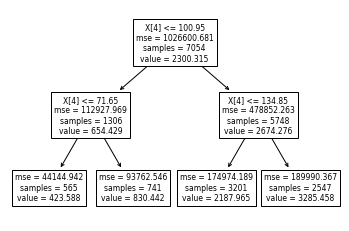

In [63]:
tree.plot_tree(dtr1)

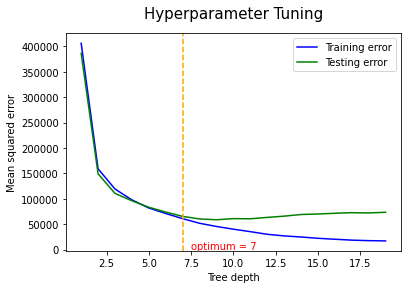

In [65]:
from sklearn.metrics import mean_squared_error as mse

max_depths = range(1, 20)
training_error = []
for max_depth in max_depths:
    model_1 = DecisionTreeRegressor(max_depth=max_depth)
    model_1.fit(trainX, trainY)
    training_error.append(mse(y, model_1.predict(x)))
    
testing_error = []
for max_depth in max_depths:
    model_3 = DecisionTreeRegressor(max_depth=max_depth)
    model_3.fit(trainX, trainY)
    testing_error.append(mse(testY, model_3.predict(testX)))

plt.plot(max_depths, training_error, color='blue', label='Training error')
plt.plot(max_depths, testing_error, color='green', label='Testing error')
plt.xlabel('Tree depth')
plt.axvline(x=7, color='orange', linestyle='--')
plt.annotate('optimum = 7', xy=(7.5, 1.17), color='red')
plt.ylabel('Mean squared error')
plt.title('Hyperparameter Tuning', pad=15, size=15)
plt.legend()
plt.savefig('error.png')

In [66]:
from sklearn.model_selection import GridSearchCV

model = DecisionTreeRegressor()

gs = GridSearchCV(model,
                  param_grid = {'max_depth': range(1, 11),
                                'min_samples_split': range(10, 60, 10)},
                  cv=5,
                  n_jobs=1,
                  scoring='neg_mean_squared_error')

gs.fit(trainX, trainY)

print(gs.best_params_)
print(-gs.best_score_)

{'max_depth': 10, 'min_samples_split': 20}
68146.38720848065


In [134]:
new_model = DecisionTreeRegressor(max_depth=10,
                                  min_samples_split=20)
# or new_model = gs.best_estimator_
new_model.fit(trainX, trainY)

testY_predict = new_model.predict(testX)


Text(0, 0.5, 'testY_predict')

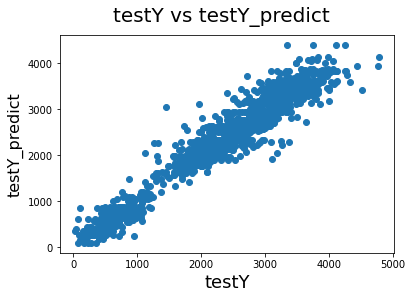

In [106]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(testY, testY_predict)
fig.suptitle('testY vs testY_predict', fontsize = 20)              # Plot heading 
plt.xlabel('testY', fontsize = 18)                                 # X-label
plt.ylabel('testY_predict', fontsize = 16)  

In [107]:
grid_predictions = grid.predict(testX_scaled)
print("Mean Absolute Error:", metrics.mean_absolute_error(testY, testY_predict))
print("Mean Squared Error:", metrics.mean_squared_error(testY, testY_predict))
print("Root Mean SquaredError:", np.sqrt(metrics.mean_squared_error(testY, testY_predict)))

Mean Absolute Error: 181.59614763874671
Mean Squared Error: 60859.728578348244
Root Mean SquaredError: 246.69764607378855


In [108]:
from sklearn.metrics import r2_score
r2_score(testY, testY_predict)

0.9409706042004023

Upon repeating the training with the same hyperparameter tuning we can see that accuracy has also decreased from 0.99 to 0.94 for Decision Tree Regressor as well.

In [71]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [109]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(trainX_scaled, trainY)

LinearRegression()

In [110]:
# Print the coefficients and intercept
print(lm.coef_)
print(lm.intercept_)

[-138.48436455   33.61424118   69.62621683  243.16632472  726.32605659]
2300.315275007089


In [111]:
y_train = lm.predict(trainX_scaled)

In [112]:
testY_predict = lm.predict(testX_scaled)

In [113]:
r2_score(testY, testY_predict)

0.9282537243695373

The linear regression model on further validation on a larger set of data appears to have decreased in accuracy as well. The R-Squared value on testing has decreased from 97.63% in the first model to 92.83% in this data set.

In [131]:
mydf1 = pd.read_csv('sbj_1_I.csv')
mydf1 = mydf1[['time','Power','Oxygen','Cadence','RF','HR']]

In [132]:
xtest = mydf1.drop('Oxygen', axis=1)
ytest = mydf1['Oxygen']
xtest_scaled = scaler.transform(xtest)

In [136]:
grid_predictions_mlp = grid.predict(xtest_scaled)
testY_predict_lm = lm.predict(xtest_scaled)
testY_predict_dt = new_model.predict(xtest)

### Model 1 MLP Regressor

In [137]:
print('R2 score:',r2_score(ytest, grid_predictions_mlp))
print("Mean Absolute Error:", metrics.mean_absolute_error(ytest, grid_predictions_mlp))
print("Mean Squared Error:", metrics.mean_squared_error(ytest, grid_predictions_mlp))
print("Root Mean SquaredError:", np.sqrt(metrics.mean_squared_error(ytest, grid_predictions_mlp)))

R2 score: 0.7554785787280404
Mean Absolute Error: 557.088377259114
Mean Squared Error: 396769.1693645987
Root Mean SquaredError: 629.8961576042504


### Model 2 Linear Regression

In [138]:
print('R2 score:',r2_score(ytest, testY_predict_lm))
print("Mean Absolute Error:", metrics.mean_absolute_error(ytest, testY_predict_lm))
print("Mean Squared Error:", metrics.mean_squared_error(ytest, testY_predict_lm))
print("Root Mean SquaredError:", np.sqrt(metrics.mean_squared_error(ytest, testY_predict_lm)))

R2 score: 0.7572116837177636
Mean Absolute Error: 532.3456184866882
Mean Squared Error: 393956.97146546515
Root Mean SquaredError: 627.6599170454213


### Model 3 Decision Tree Regressor

In [139]:
print('R2 score:',r2_score(ytest, testY_predict_dt))
print("Mean Absolute Error:", metrics.mean_absolute_error(ytest, testY_predict_dt))
print("Mean Squared Error:", metrics.mean_squared_error(ytest, testY_predict_dt))
print("Root Mean SquaredError:", np.sqrt(metrics.mean_squared_error(ytest, testY_predict_dt)))

R2 score: 0.8081799636124225
Mean Absolute Error: 420.6163441832509
Mean Squared Error: 311254.02473568026
Root Mean SquaredError: 557.9014471532407
